In [2]:
import os
import sys
import re
import shutil
import configparser
import json
import pkg_resources
import locale
import requests
#import requests_cache


def get_price(coin, curr='USD'):
    #Get the data on a user specified coin from the cryptocompare website API
    
    fmt = 'https://min-api.cryptocompare.com/data/pricemultifull?fsyms={}&tsyms={}&api_key=4120b66bee53ddad00260553cac1215997407f8b2abbdcb714c55a7f3240ed27'

    try:
        r = requests.get(fmt.format(coin, curr))
    except requests.exceptions.RequestException:
        sys.exit('Could not complete request')

    try:
        data_raw = r.json()['RAW']
        #return data_raw
        return [(float(data_raw[c][curr]['PRICE'])) for c in coin.split(',') if c in data_raw.keys()]
          
    except:
            sys.exit('Could not parse data')


#example call to print the price of Bitcoin (symbol BTC)
#for i in BTC_Pricing:
#    print("", get_price(i))

In [3]:
for i, j in zip(('ETH','LTC','ADA','DOT','BCH','XLM','LINK','BNB','USDT','XMR'), ['Ethereum', 'Litecoin', 'Cardano','Polkadot','Bitcoin Cash','Stellar','Chainlink','Binance Coin','Tether','Monero']):
    print(j,"Price is",get_price(i))

Ethereum Price is [4416.02]
Litecoin Price is [165.86]
Cardano Price is [1.405]
Polkadot Price is [29.7]
Bitcoin Cash Price is [480.88]
Stellar Price is [0.2956]
Chainlink Price is [22.82]
Binance Coin Price is [592.67]
Tether Price is [1.001]
Monero Price is [209.16]


### With the help of above code we can get the prices of 10 bitcoins, we know that the pricing of bitcoins change with every second of time. It will be a good idea to collect the current prices of these bitcoins for a certain period and analyse it. The best part is that when we run it we can get the idea of the movement of the price.
### With the help of a for loop we can store the prices for bitcoins with a small time limit. I used a gap of 5 second that can be further increased depending on the preferences of the user and deciosion of selection of total observations. 

In [4]:
from time import sleep
p = []
for k in range(100):
    for i in ['ETH','LTC','ADA','DOT','BCH','XLM','LINK','BNB','USDT','XMR']:
        p = p + get_price(i)
        sleep(0.5)


#### After storing all the prices we need to transform them in a matrix form with the number of columns as equal to the bitcoins and number of oservations as how many iterations we ran.

In [5]:
import numpy as np
#np.shape(p)
l = np.reshape(p, (100, 10))

#### The matrix of pricess does not have the column names and we need to transform it into a dataframe.

In [6]:
import pandas as pd
g = pd.DataFrame(l)
g.columns =['Ethereum', 'Litecoin', 'Cardano','Polkadot','Bitcoin Cash','Stellar','Chainlink','Binance Coin','Tether','Monero']

#### The sample of the data looks like below

In [7]:
print(g)

    Ethereum  Litecoin  Cardano  Polkadot  Bitcoin Cash  Stellar  Chainlink  \
0    4417.41    165.90    1.405     29.68        480.84   0.2957      22.82   
1    4417.29    165.94    1.405     29.67        481.07   0.2958      22.83   
2    4415.52    165.90    1.404     29.69        480.72   0.2957      22.83   
3    4417.33    166.00    1.404     29.69        480.78   0.2958      22.82   
4    4414.82    165.94    1.404     29.67        480.88   0.2957      22.82   
..       ...       ...      ...       ...           ...      ...        ...   
95   4404.56    166.03    1.401     29.58        480.12   0.2993      22.85   
96   4405.92    166.05    1.401     29.59        480.13   0.2992      22.86   
97   4406.05    166.12    1.401     29.59        480.39   0.2992      22.85   
98   4405.49    166.10    1.401     29.57        480.39   0.2992      22.85   
99   4406.21    166.08    1.401     29.59        480.63   0.2992      22.85   

    Binance Coin  Tether  Monero  
0         592.60

#### After getting the data it's time to explore it and find out what can we infer related to the price movement of these bitcoins at current period of time.
##### A good idea is to check the distribution of prices for thetime period to check what is the range of prices in which it varies and what is the general price that it holds for a longer time.

##### From above graph we can see the pricing range of bitcoins and we can see the intensity as well from which we can decide the most common  price of that time.

array([<AxesSubplot:title={'center':'Ethereum'}>,
       <AxesSubplot:title={'center':'Litecoin'}>,
       <AxesSubplot:title={'center':'Cardano'}>,
       <AxesSubplot:title={'center':'Polkadot'}>,
       <AxesSubplot:title={'center':'Bitcoin Cash'}>,
       <AxesSubplot:title={'center':'Stellar'}>,
       <AxesSubplot:title={'center':'Chainlink'}>,
       <AxesSubplot:title={'center':'Binance Coin'}>,
       <AxesSubplot:title={'center':'Tether'}>,
       <AxesSubplot:title={'center':'Monero'}>], dtype=object)

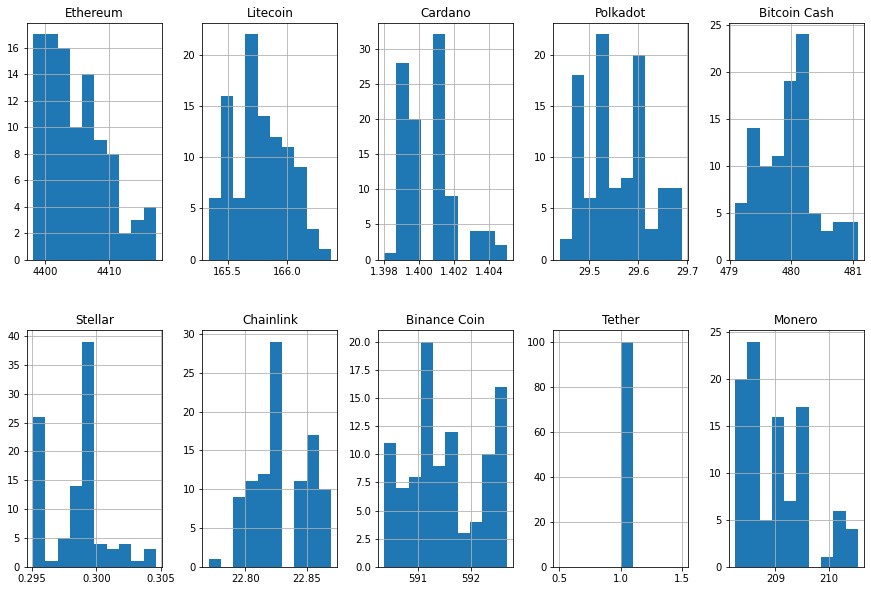

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fig, axis = plt.subplots(2,5,figsize=(15, 10))
g.hist(ax=axis)

##### From above graph we can see the pricing range of bitcoins and we can see the intensity as well from which we can decide the most common  price of that time.

#### It is possible that the prices of these bitcoins relate to each other such the pricing of one bitcoins popular in gaming industry or finance industry may correlate to the pricing of another bitcoin in the same industry. We can observe this relation by coreelation value that vary in between -1 and 1. Values closer to -1 and 1 represent high degree of correlation(close relation) between bitcoin prices while a correlation of 0 means there is no correlation. Also, the negative value of correlation means a negative relationship between bitcoin prices that can be interpreted as the increase in one bitcoin prices may cause a reduction in the prices of another bitoin price. 

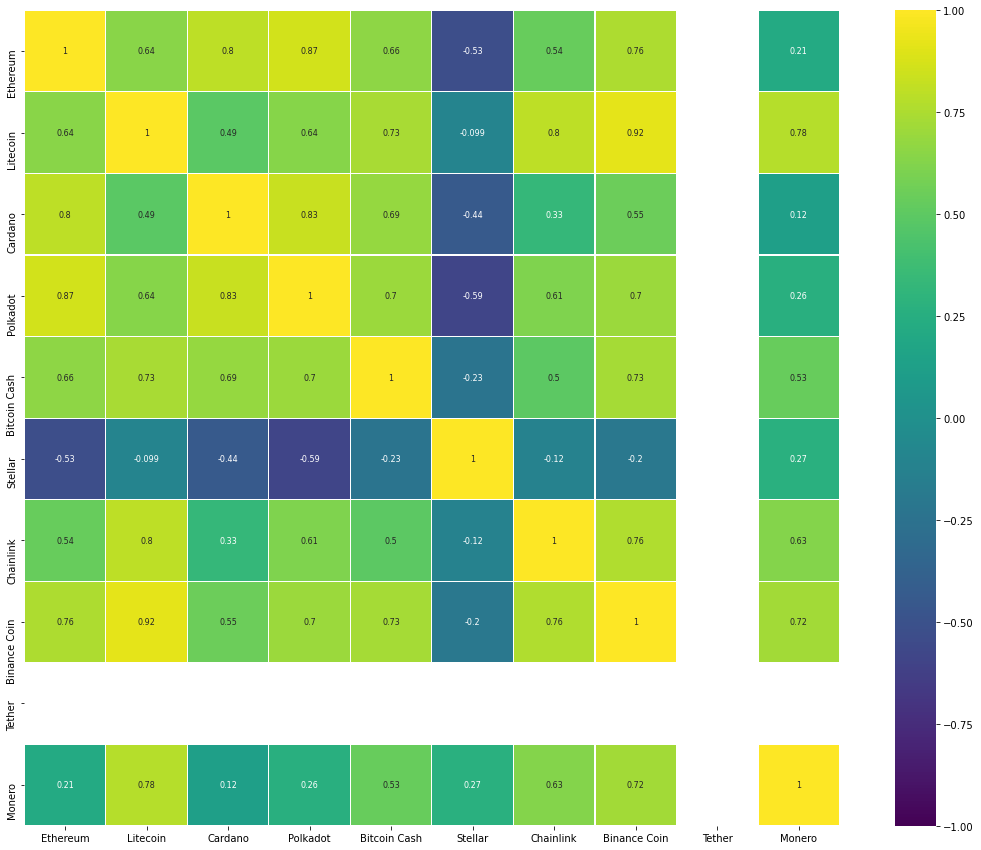

In [9]:
import seaborn as sns
corr = g.corr() # We already examined SalePrice correlations
plt.figure(figsize=(20, 15))

sns.heatmap(corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

#### The above correlation plot can be interpreted with the help of the scale given, color of extreme blue and yellow represent a correlation value of -1 and 1. In the chart we see that the diagonal line is all yeloow because it represent the correlation of a bitcoin price with itself rest all values we can interpret with the help of names given at the bottom(x axis) and left(y axis). The intersection of x and y axis value represent the correlation of bitcoins prices given on both axis; such as: bottom extreme left corner value 0.05 represent the correlation between Ethereum and Monero bitcoins, similarly, to check the correlation between Litecoin and Bitcoin cash see the value given at second column from left 5th row from bottom. The correlation value is .95.

##### Also, the orrelation can be plotted in a scatter diagram, witht scatter diagram we can figure out the relationship etwen two variables, and the degree of their realtionship. If the points are not too scattered( and closer to each other we can say that the variables have strong or high degree of correlation. The type of relationship can be determined with the direction of the movement of the points, if the points move digonally from left to roght we say that there is a positive relationship between variables while it moves top to bottom from left to right(Non diagonal) we say that they have negative relationship.

<Figure size 1080x720 with 0 Axes>

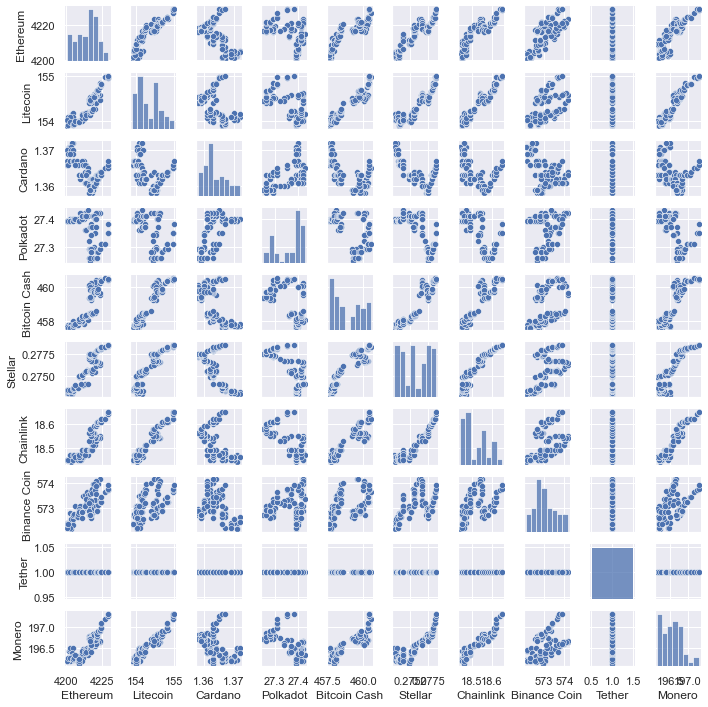

In [96]:
#scatterplot
plt.figure(figsize=(15, 10))
sns.set()
cols = ['Ethereum', 'Litecoin', 'Cardano','Polkadot','Bitcoin Cash','Stellar','Chainlink','Binance Coin','Tether','Monero']
sns.pairplot(g[cols], height = 1)
plt.show()

##### In the above graph we observe that between Litecoin and Bitcoin cash there is a high degree positive correlation and this we obsereved in the correlation plot as well.

<AxesSubplot:xlabel='Ethereum', ylabel='Density'>

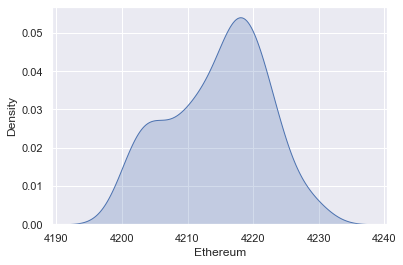

In [143]:
sns.kdeplot(data=g['Ethereum'],shade=True)#, shade=True))

<AxesSubplot:xlabel='Litecoin', ylabel='Density'>

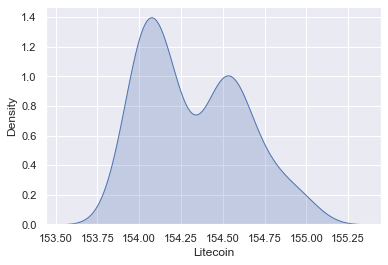

In [134]:

sns.kdeplot(data=g['Litecoin'],shade=True)#, shade=True))


<AxesSubplot:xlabel='Cardano', ylabel='Density'>

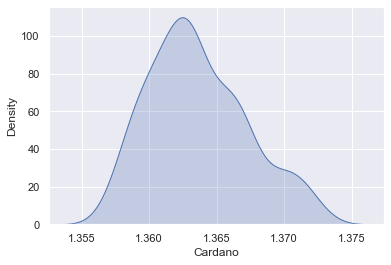

In [135]:

sns.kdeplot(data=g['Cardano'],shade=True)#, shade=True))


<AxesSubplot:xlabel='Polkadot', ylabel='Density'>

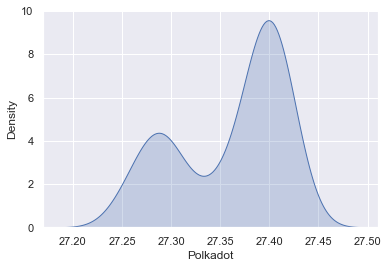

In [136]:

sns.kdeplot(data=g['Polkadot'],shade=True)#, shade=True))


<AxesSubplot:xlabel='Bitcoin Cash', ylabel='Density'>

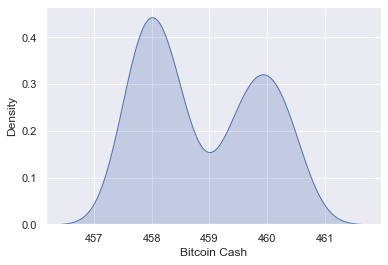

In [137]:

sns.kdeplot(data=g['Bitcoin Cash'],shade=True)#, shade=True))


<AxesSubplot:xlabel='Stellar', ylabel='Density'>

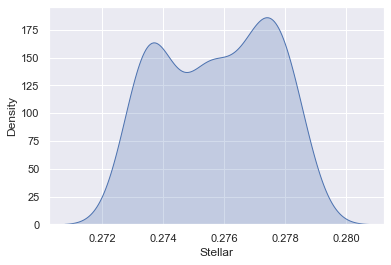

In [138]:

sns.kdeplot(data=g['Stellar'],shade=True)#, shade=True))


<AxesSubplot:xlabel='Chainlink', ylabel='Density'>

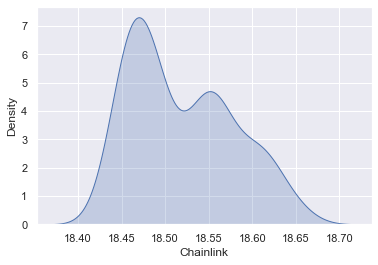

In [139]:

sns.kdeplot(data=g['Chainlink'],shade=True)#, shade=True))


<AxesSubplot:xlabel='Binance Coin', ylabel='Density'>

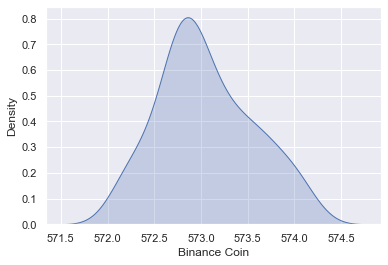

In [140]:

sns.kdeplot(data=g['Binance Coin'],shade=True)#, shade=True))


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Tether', ylabel='Density'>

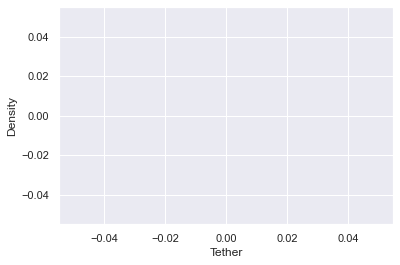

In [141]:

sns.kdeplot(data=g['Tether'],shade=True)#, shade=True))


<AxesSubplot:xlabel='Monero', ylabel='Density'>

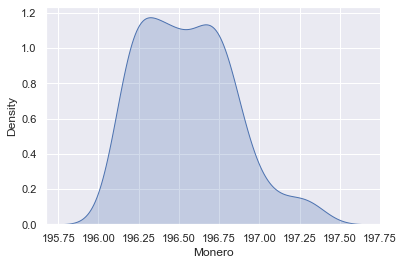

In [142]:

sns.kdeplot(data=g['Monero'],shade=True)